In [2]:
# Initial imports
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib import style
style.use("ggplot")
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
import lazypredict



# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [3]:
#file_path = Path("../Resources/metro_2br.csv")
#metro_df = pd.read_csv(file_path)
#metro_df.drop(columns='indicator_id', inplace=True)
#metro_df.head()


#metro_df.set_index(pd.to_datetime(metro_df['date']), inplace=True)
#metro_df.drop('date', axis=1, inplace=True)
#metro_df.head()

### Memphis Condo Regression

In [4]:
file_path = Path("../Resources/mem_condo.csv")
metro_df = pd.read_csv(file_path)
metro_df = metro_df.drop('indicator_id',axis=1)
metro_df = metro_df.drop('region_id',axis=1)
metro_df = metro_df.sort_values('date')
metro_df['date'] = pd.to_datetime(metro_df['date'])
metro_df = metro_df.set_index('date')
metro_df = metro_df.dropna()
metro_df.head()

,value,region,change,lagged_change
date,,,,
1996-01-31,148402.0,"Memphis, TN",-26.165955,-0.728016
1996-02-29,148736.0,"Memphis, TN",0.225064,-26.165955
1996-03-31,149174.0,"Memphis, TN",0.294481,0.225064
1996-04-30,150041.0,"Memphis, TN",0.581200,0.294481
1996-05-31,150952.0,"Memphis, TN",0.607167,0.581200


<AxesSubplot:xlabel='date'>

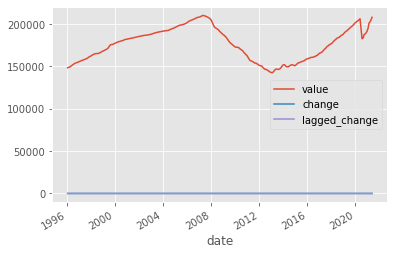

In [5]:
metro_df.plot()

In [6]:
#Build Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model

LinearRegression()

In [7]:
# Separate the data into the X and y components
# In this case, y will be the `value` and X will be the remainign columns

#X = metro_df.drop(columns='value', axis=1)
X = metro_df.lagged_change.to_frame()
y = metro_df.change.values

In [8]:
# Fit the model to the data

model.fit(X, y)

LinearRegression()

In [9]:
predicted_y_values = model.predict(X)
predicted_y_values

array([ 5.13911383e-02,  1.19916039e+00,  8.38778630e-03,  5.25565893e-03,
       -7.68120792e-03, -8.85284395e-03, -7.55166995e-03, -6.98556444e-03,
       -4.35961829e-03,  3.81225517e-03,  6.40985988e-03,  6.99772916e-03,
        8.46680946e-04,  5.76540540e-03,  2.21076041e-03,  6.56876520e-03,
        2.97459787e-03,  6.52681042e-03,  6.73033431e-03,  4.93545899e-03,
        5.57363523e-03, -6.66889092e-03, -4.21623629e-03, -4.97188864e-03,
        6.73473863e-03, -1.36433729e-03, -3.89858886e-04, -3.51281136e-03,
        8.40645065e-03,  8.18249769e-03,  1.68473619e-02,  1.97181818e-02,
        1.07229043e-02,  4.07647934e-03, -3.74030218e-03,  2.51499177e-03,
       -8.27518948e-04,  3.58019362e-03,  4.96834843e-03,  5.16922672e-03,
       -6.99741775e-04, -2.07562548e-03, -2.64900122e-02, -2.42165617e-02,
       -1.28440060e-02,  1.43799272e-02,  1.48458764e-02,  3.69033591e-03,
        3.22771149e-03,  2.51508229e-03,  5.28865485e-03,  7.98572454e-03,
        6.24233803e-03,  

In [10]:
#Extracting coef, intercept

model.coef_
model.intercept_


0.018542773459796894

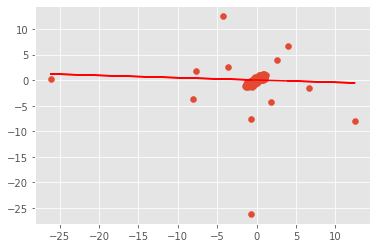

In [11]:
#Plotting Results

plt.scatter(X, y)
plt.plot(X, predicted_y_values, color='red')

In [12]:
#Metrics - score, R2, mse, rmse, std

from sklearn.metrics import mean_squared_error, r2_score

score = model.score(X, y, sample_weight=None)
r2 = r2_score(y, predicted_y_values)
mse = mean_squared_error(y, predicted_y_values)
rmse = np.sqrt(mse)
std = np.std(y)

In [13]:
# Print the score, r2, mse, rmse, and standard deviation
print(f"Score: {score}")
print(f"R-squared (R2 ): {r2}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Standard Deviation: {np.std(y)}")

Score: 0.002035937161346646
R-squared (R2 ): 0.002035937161346646
Mean Squared Error (MSE): 3.7500086356699076
Root Mean Squared Error (RMSE): 1.9364939028228072
Standard Deviation: 1.9384682079554314


In [14]:
#Build Logistic Regression

#train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [15]:
#Create Model
#classifier = LogisticRegression(solver='lbfgs', warm_start=True, random_state=78)
#classifier

In [16]:
# Train the data
#classifier.fit(X_train, y_train)

In [17]:
# Score the model
#print(f"Training Data Score: {classifier.score(X_train, y_train)}")
#print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

In [18]:
# Predict outcomes for test data set
#predictions = classifier.predict(X_test)
#pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

In [19]:
#Confusion Matrix
#from sklearn.metrics import confusion matrix
#confusion_matrix(y_test, predictions)

In [20]:
#Classification Report
#from sklearn.metrics import classsification report
#print(classification_report(y_test, predictions))

In [21]:
#Build LSTM Model

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [22]:
# Predict Percent Change of Housing Prices using a 10 month window of previous fng values
# Then, experiment with window sizes anywhere from 1 to 10 and see how the model performance changes
window_size = 3

# Column index 0 is the 'fng_value' column
# Column index 1 is the `Close` column
feature_column = 3
target_column = 2
X, y = window_data(metro_df, window_size, feature_column, target_column)

In [23]:
# Use 70% of the data for training and the remaineder for testing
split = int(0.8 * len(X))

X_train = X[: split]
X_test = X[split:]
y_train = y [: split]
y_test = y[split:]

In [24]:
from sklearn.preprocessing import MinMaxScaler
# Use the MinMaxScaler to scale data between 0 and 1.
scaler = MinMaxScaler()
scaler.fit(X)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)


In [25]:
# Reshape the features for the model
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\envs\deep\lib\site-packages\te

In [27]:
# Build the LSTM model. 
# The return sequences need to be set to True if you are adding additional LSTM layers, but 
# You don't have to do this for the final layer. 
# Note: The dropouts help prevent overfitting
# Note: The input shape is the number of time steps and the number of indicators
# Note: Batching inputs has a different input shape of Samples/TimeSteps/Features

model = Sequential()

number_units = 10
dropout_fraction = 0.2


# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [28]:
# Compile the model
model.compile(optimizer='adam', loss="mean_squared_error")

In [29]:
# Summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 3, 10)             480       
_________________________________________________________________
dropout (Dropout)            (None, 3, 10)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 3, 10)             840       
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 10)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10)                840       
_________________________________________________________________
dropout_2 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [30]:
# Train the model
# Use at least 10 epochs
# Do not shuffle the data
# Experiement with the batch size, but a smaller batch size is recommended
model.fit(X_train, y_train, epochs=10, shuffle=False, batch_size=1, verbose=1)

Epoch 1/10
239/239 [==============================] - 4s 2ms/step - loss: 0.0253
Epoch 2/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0038
Epoch 3/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 4/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 5/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0023
Epoch 6/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 7/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 8/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 9/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0012
Epoch 10/10
239/239 [==============================] - 1s 2ms/step - loss: 0.0011


In [31]:
# Evaluate the model
model.evaluate(X_test, y_test)

2/2 [==============================] - 1s 2ms/step - loss: 0.0139


0.01392531767487526

In [32]:
# Make some predictions
predicted = model.predict(X_test)

In [33]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [34]:
# Create a DataFrame of Real and Predicted values
housing = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = metro_df.index[-len(real_prices): ]) 

housing.tail()

,Real,Predicted
date,,
2021-01-31,1.846427,0.171096
2021-02-28,4.004694,0.172232
2021-03-31,-0.728016,0.173037
2021-04-30,-1.121291,0.171717
2021-05-31,-1.508418,0.172669


<AxesSubplot:xlabel='date'>

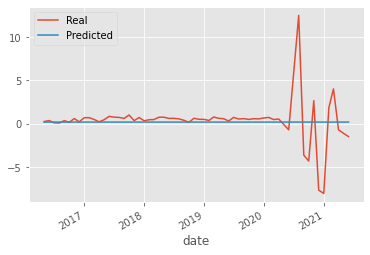

In [36]:
# Plot the real vs predicted values as a line chart
housing.plot()

In [37]:
#Lazy Predict - Regression

#from lazypredict.Supervised import LazyClassifier
#from sklearn.datasets import load_breast_cancer
#from sklearn.model_selection import train_test_split

#data = load_breast_cancer()
#X = data.data
#y= data.target

#X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)

#clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
#models,predictions = clf.fit(X_train, X_test, y_train, y_test)

#print(models)